## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv("Cust_Segmentation.csv")
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


## Data Preprocessing

In [7]:
df.drop("Address", axis=1, inplace= True)
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [8]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 1:].values
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

In [22]:
from sklearn.cluster import KMeans
cluster_num = 3
k_means = KMeans(init="k-means++", n_clusters = cluster_num, n_init= 12)
k_means.fit(X)
labels = k_means.labels_
labels

array([2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1,
       0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2,

In [23]:
df["cluster_km"] = labels
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,2
846,847,28,2,7,34,0.359,2.021,0.0,7.0,2
847,848,25,4,0,18,2.802,3.210,1.0,33.4,1
848,849,32,1,12,28,0.116,0.696,0.0,2.9,2


In [24]:
df.groupby("cluster_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_km,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_29126/2606184882.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)


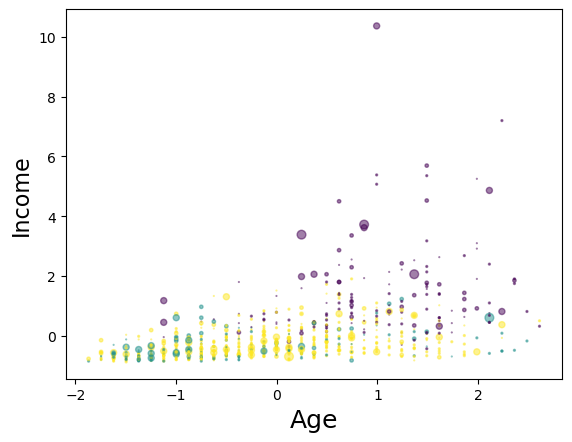

In [25]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_29126/947083049.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
/var/folders/6d/7p8150cn1qq03p3t9h0xpkrm0000gn/T/ipykernel_29126/947083049.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labe

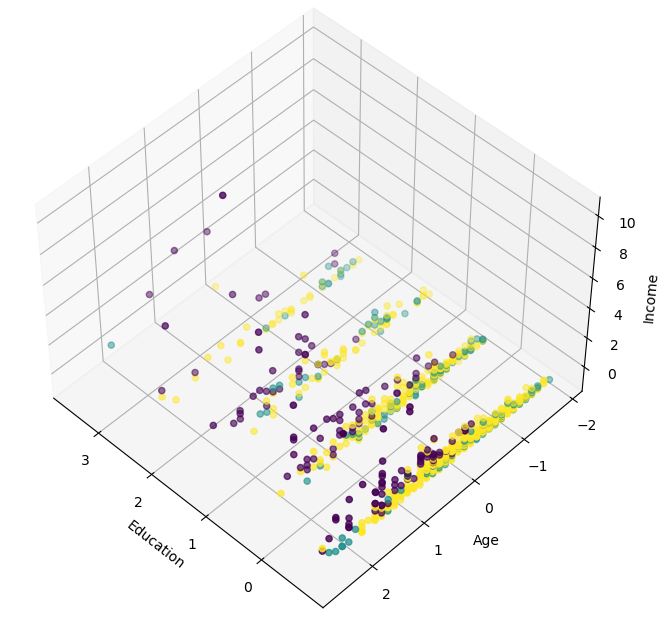

In [26]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))